In [1]:
# Importing the libraries
import pandas as pd  # Importing the Pandas library for data manipulation and analysis
import numpy as np   # Importing the NumPy library for numerical operations
import matplotlib.pyplot as plt   # Importing the Matplotlib library for data visualization
import seaborn as sns   # Importing the Seaborn library for statistical data visualization
%matplotlib inline   
# A magic command that allows plots to be displayed inline in Jupyter Notebook

In [2]:
df = pd.read_csv('EPL_20_21.csv')

In [3]:
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [4]:
df.info()
#provides information about the DataFrame's structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [5]:
df.describe()
#The famous describe command, which gives some stats for the dataframe

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


In [6]:
df.isnull().sum()
#No null values, which is good

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [7]:
#We added 2 new columns to the dataframe
df['MinutesPerMatch'] = (df['Mins'] / df['Matches']).astype(int)
df['GoalsPerMatch'] = (df['Goals'] / df['Matches']).astype(float)

In [8]:
TotalGoals = df['Goals'].sum()
TotalGoals

986

In [9]:
PenaltyGoals = df['Penalty_Goals'].sum()
PenaltyGoals

102

In [10]:
PenaltyAttemps = df['Penalty_Attempted'].sum()
PenaltyAttemps

125

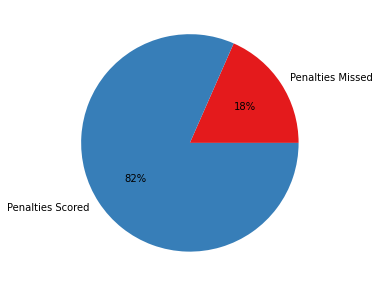

In [11]:
plt.figure(figsize=(5, 5))  ## Setting the figure size of the plot (commented out)
PenaltyNotScored = PenaltyAttemps - PenaltyGoals  ## Calculating the number of penalties missed
data = [PenaltyNotScored, PenaltyGoals]  ## Defining the data to be plotted
labels = ['Penalties Missed', 'Penalties Scored']  ## Defining the labels for each data category
colors = sns.color_palette('Set1')  ## Defining the colors for the pie chart
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')  ## Creating the pie chart with labels and colors
plt.show()  ## Displaying the pie chart

In [12]:
df['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [13]:
df[df['Position'] == 'FW']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinutesPerMatch,GoalsPerMatch
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
16,Tammy Abraham,Chelsea,ENG,FW,22,22,12,1040,6,1,218,68.3,0,0,0.56,0.07,0,0,47,0.272727
19,Olivier Giroud,Chelsea,FRA,FW,33,17,8,748,4,0,217,74.2,0,0,0.58,0.09,1,0,44,0.235294
23,Ruben Loftus-Cheek,Chelsea,ENG,FW,24,1,1,60,0,0,16,68.8,0,0,0.00,0.00,0,0,60,0.000000
30,Raheem Sterling,Manchester City,ENG,FW,25,31,28,2536,10,7,1127,85.4,0,1,0.43,0.17,4,0,81,0.322581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Oliver Burke,Sheffield United,SCO,FW,23,25,14,1269,1,1,262,70.6,0,0,0.17,0.13,2,0,50,0.040000
518,Oliver McBurnie,Sheffield United,SCO,FW,24,23,12,1324,1,0,426,62.9,0,0,0.21,0.07,2,0,57,0.043478
519,Rhian Brewster,Sheffield United,ENG,FW,20,27,12,1128,0,0,225,69.3,0,0,0.14,0.13,1,0,41,0.000000
523,Billy Sharp,Sheffield United,ENG,FW,34,16,7,735,3,0,123,69.9,2,2,0.33,0.07,1,0,45,0.187500


In [14]:
df['Nationality'].nunique()
#There are 59 unique nationalities in the premier league

59

<AxesSubplot:xlabel='Nationality'>

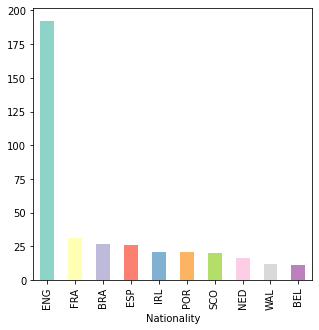

In [15]:
Nationality = df.groupby('Nationality').size().sort_values(ascending=False)  ## Grouping the DataFrame by 'Nationality' column, calculating the size of each group, and sorting them in descending order
Nationality.head(10).plot(kind='bar', figsize=(5, 5), color=sns.color_palette('Set3'))  ## Plotting a bar chart of the top 10 nationalities based on the count, setting the figure size to (5,5), and defining the colors for the bars

<AxesSubplot:>

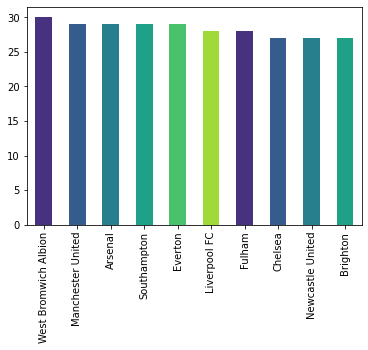

In [16]:
df['Club'].value_counts().nlargest(10).plot(kind = 'bar', color = sns.color_palette('viridis'))
# Counting the occurrences of each club in the 'Club' column

In [17]:
Under20 = df[df['Age'] <= 20]
Age_20_25 = df[(df['Age'] > 20) & (df['Age'] <= 25)]
Age_25_30 = df[(df['Age'] > 25) & (df['Age'] <= 30)]
AgeAbove30 = df[df['Age'] > 30]

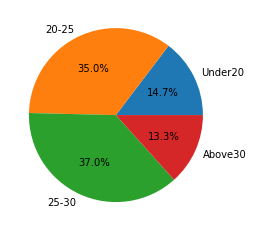

In [18]:
X = np.array([Under20['Name'].count(), Age_20_25['Name'].count(), Age_25_30['Name'].count(), AgeAbove30['Name'].count()])
labels = ['Under20', '20-25', '25-30', 'Above30']
plt.pie(X, labels = labels, autopct = '%.1f%%')
plt.show()

<AxesSubplot:>

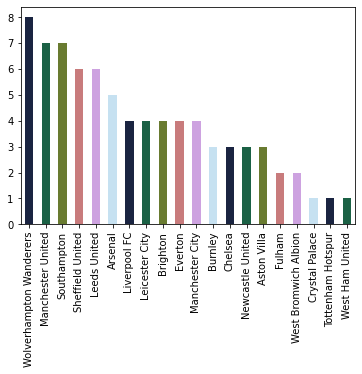

In [19]:
Under20['Club'].value_counts().plot(kind = 'bar', color = sns.color_palette('cubehelix'))

<AxesSubplot:>

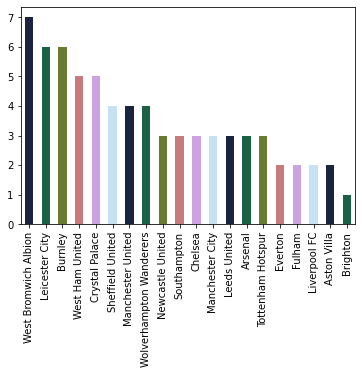

In [20]:
AgeAbove30['Club'].value_counts().plot(kind = 'bar', color = sns.color_palette('cubehelix'))

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

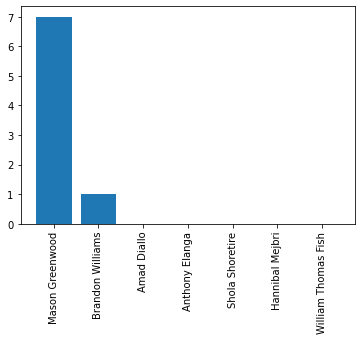

In [21]:
MANU_Under20 = Under20[Under20['Club'] == 'Manchester United']
plt.bar(MANU_Under20['Name'],MANU_Under20['Goals'].sort_values(ascending = False))
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

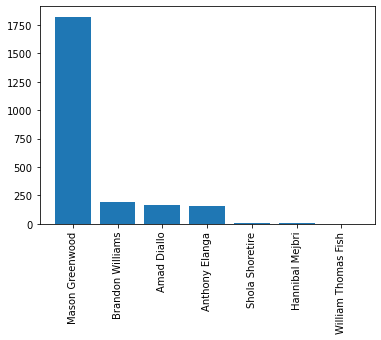

In [22]:
MANU_Under20 = Under20[Under20['Club'] == 'Manchester United']
plt.bar(MANU_Under20['Name'],MANU_Under20['Mins'].sort_values(ascending = False))
plt.xticks(rotation=90)

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

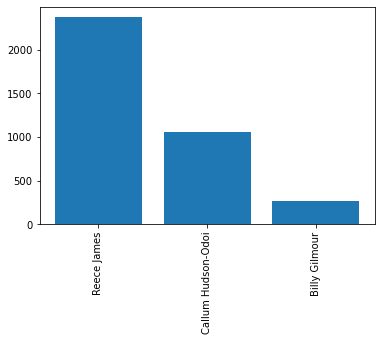

In [23]:
Chelsea_Under20 = Under20[Under20['Club'] == 'Chelsea']
plt.bar(Chelsea_Under20['Name'],Chelsea_Under20['Mins'])
plt.xticks(rotation=90)

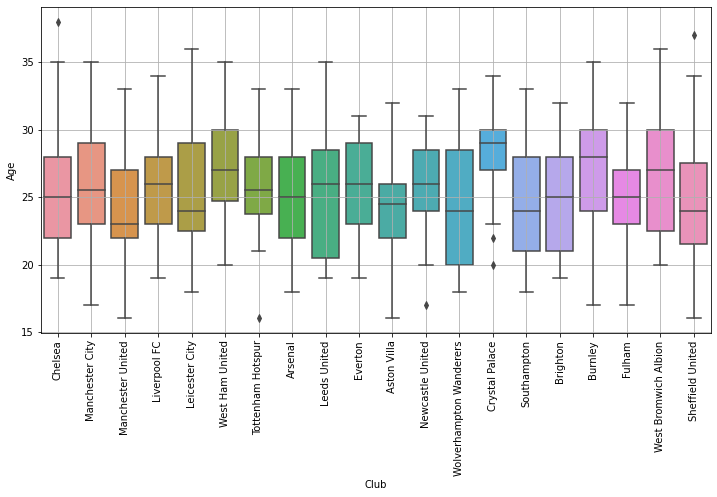

In [24]:
plt.figure(figsize=(12, 6))  ## Setting the figure size of the plot to (12, 6)
sns.boxplot(x='Club', y='Age', data=df)  ## Creating a box plot with 'Club' on the x-axis and 'Age' on the y-axis using data from DataFrame 'df'
plt.xticks(rotation=90)  ## Rotating the x-axis labels by 90 degrees for better readability
plt.grid()  ## Adding grid lines to the plot

Text(0.5, 1.0, 'Plot of Clubs vs Total Assits')

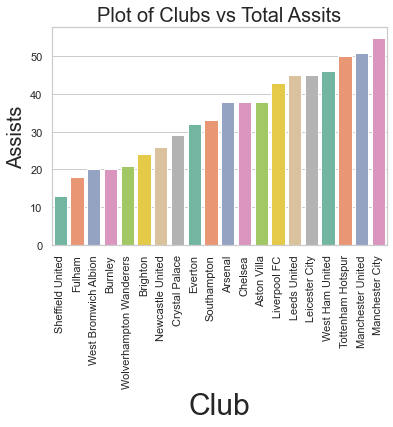

In [25]:
# Total assists from each club
AssitsByclubs = pd.DataFrame(df.groupby('Club', as_index=False)['Assists'].sum())

sns.set_theme(style='whitegrid', color_codes=True)

ax = sns.barplot(x='Club', y='Assists', data=AssitsByclubs.sort_values(by='Assists'), palette='Set2')
# Creating a bar plot with 'Club' on the x-axis, 'Assists' on the y-axis,
# using data from the 'AssitsByclubs' DataFrame,
# and sorting the bars based on the 'Assists' column values.
# The color palette 'Set2' is used to assign colors to the bars.

ax.set_xlabel('Club', fontsize=30)  # Setting the x-axis label and fontsize
ax.set_ylabel('Assists', fontsize=20)  # Setting the y-axis label and fontsize

plt.xticks(rotation=90)  # Rotating the x-axis labels by 90 degrees for better readability
plt.rcParams['figure.figsize'] = (20, 8)  # Setting the figure size to (20, 8)

plt.title('Plot of Clubs vs Total Assits', fontsize=20)  # Setting the title of the plot

In [26]:
Top10Assists = df[['Name', 'Club', 'Assists', 'Matches']].nlargest(n = 10, columns = 'Assists')
Top10Assists

,Name,Club,Assists,Matches
162,Harry Kane,Tottenham Hotspur,14,35
34,Kevin De Bruyne,Manchester City,12,25
51,Bruno Fernandes,Manchester United,12,37
161,Son Heung-min,Tottenham Hotspur,10,37
273,Jack Grealish,Aston Villa,10,26
54,Marcus Rashford,Manchester United,9,37
110,Jamie Vardy,Leicester City,9,34
220,Raphael Dias Belloli,Leeds United,9,30
2,Timo Werner,Chelsea,8,35
136,Aaron Cresswell,West Ham United,8,36


Text(0.5, 1.0, 'Plot of Clubs vs Total Goals')

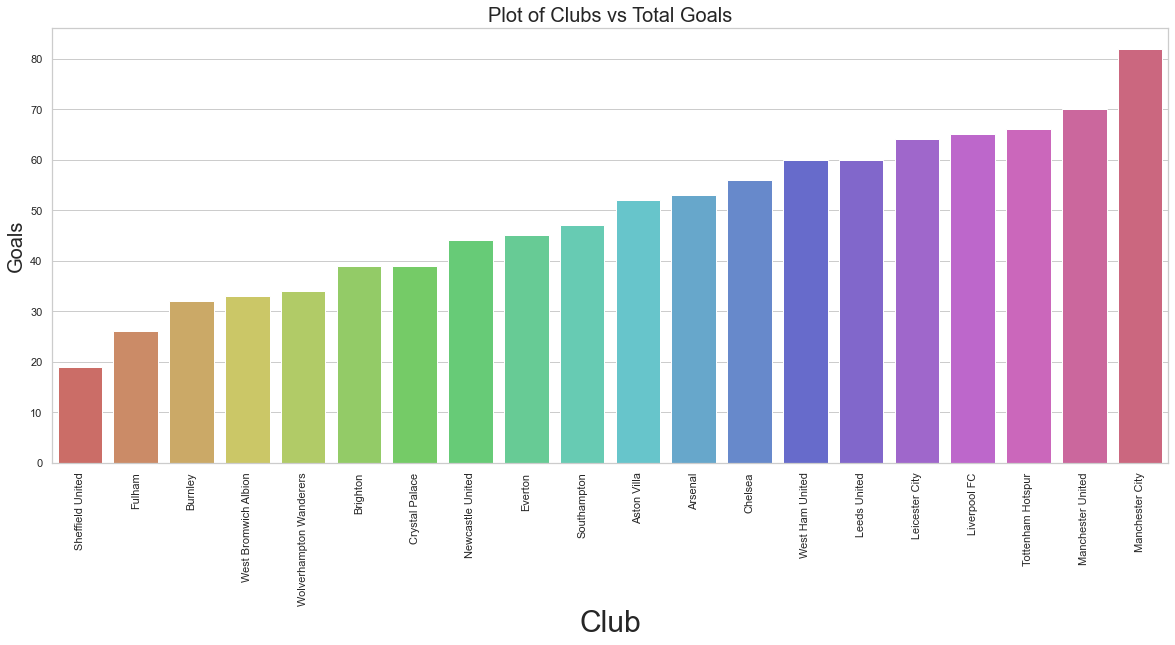

In [27]:
GoalsByClubs = pd.DataFrame(df.groupby('Club', as_index=False)[ 'Goals' ].sum())
sns.set_theme(style='whitegrid', color_codes = True)

ax = sns.barplot(x='Club' ,y='Goals' ,data = GoalsByClubs.sort_values(by="Goals"), palette='hls')
ax.set_xlabel('Club', fontsize=30)
ax.set_ylabel('Goals', fontsize=20)

plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = (20,8)

plt.title('Plot of Clubs vs Total Goals' ,fontsize = 20)

In [28]:
TopScorers = df[['Name', 'Club', 'Matches', 'Goals']].nlargest( n = 10, columns = 'Goals')
TopScorers

,Name,Club,Matches,Goals
162,Harry Kane,Tottenham Hotspur,35,23
81,Mohamed Salah,Liverpool FC,37,22
51,Bruno Fernandes,Manchester United,37,18
161,Son Heung-min,Tottenham Hotspur,37,17
214,Patrick Bamford,Leeds United,38,17
237,Dominic Calvert-Lewin,Everton,33,16
110,Jamie Vardy,Leicester City,34,15
267,Ollie Watkins,Aston Villa,37,14
33,İlkay Gündoğan,Manchester City,28,13
191,Alexandre Lacazette,Arsenal,31,13


In [29]:
TopScorersPerMatch = df[['Name', 'GoalsPerMatch', 'Matches', 'Goals']].nlargest( n = 10, columns = 'GoalsPerMatch')
TopScorersPerMatch

,Name,GoalsPerMatch,Matches,Goals
162,Harry Kane,0.657143,35,23
81,Mohamed Salah,0.594595,37,22
307,Joe Willock,0.571429,14,8
145,Jesse Lingard,0.562500,16,9
175,Gareth Bale,0.550000,20,11
74,Anthony Elanga,0.500000,2,1
51,Bruno Fernandes,0.486486,37,18
237,Dominic Calvert-Lewin,0.484848,33,16
120,Kelechi Iheanacho,0.480000,25,12
92,Diogo Jota,0.473684,19,9


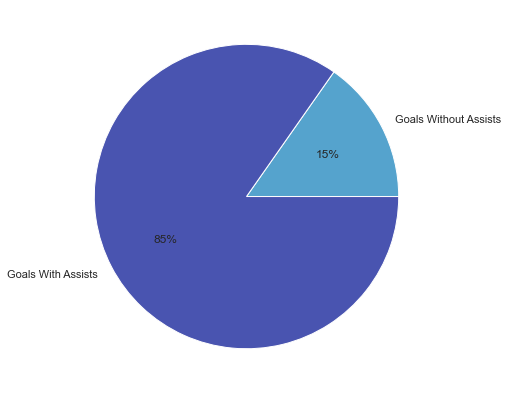

In [30]:
plt.figure(figsize=(14, 7))  # Setting the figure size of the plot to (14, 7)
assists = df['Assists'].sum()  # Calculating the total number of assists
data = [TotalGoals - assists,TotalGoals + assists]  # Creating a list with the number of goals without assists and number of goals with assists
labels = ['Goals Without Assists', 'Goals With Assists']  # Defining the labels for each data category
color = sns.color_palette('icefire')  # Defining the colors for the pie chart using the 'icefire' color palette
plt.pie(data, labels=labels, colors=color, autopct='%.0f%%')  # Creating the pie chart with labels, colors, and autopct format
plt.show()  # Displaying the pie chart

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'John McGinn'),
  Text(1, 0, 'Harry Maguire'),
  Text(2, 0, 'Conor Gallagher'),
  Text(3, 0, 'Kalvin Phillips'),
  Text(4, 0, 'Douglas Luiz'),
  Text(5, 0, 'Pierre Højbjerg'),
  Text(6, 0, 'Mason Holgate'),
  Text(7, 0, 'John Lundstram'),
  Text(8, 0, 'Luka Milivojević'),
  Text(9, 0, 'Rúben Neves')])

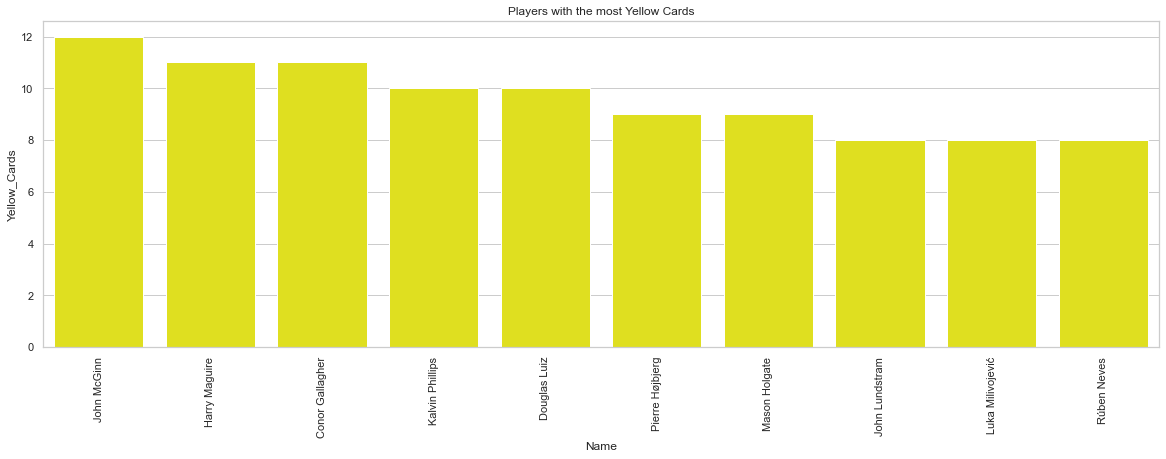

In [31]:
Y = df.sort_values(by = 'Yellow_Cards', ascending = False)[:10]
plt.figure(figsize = (20, 6))
plt.title('Players with the most Yellow Cards')
sns.barplot(x = Y['Name'], y = Y['Yellow_Cards'], label = 'Players', color = 'yellow')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

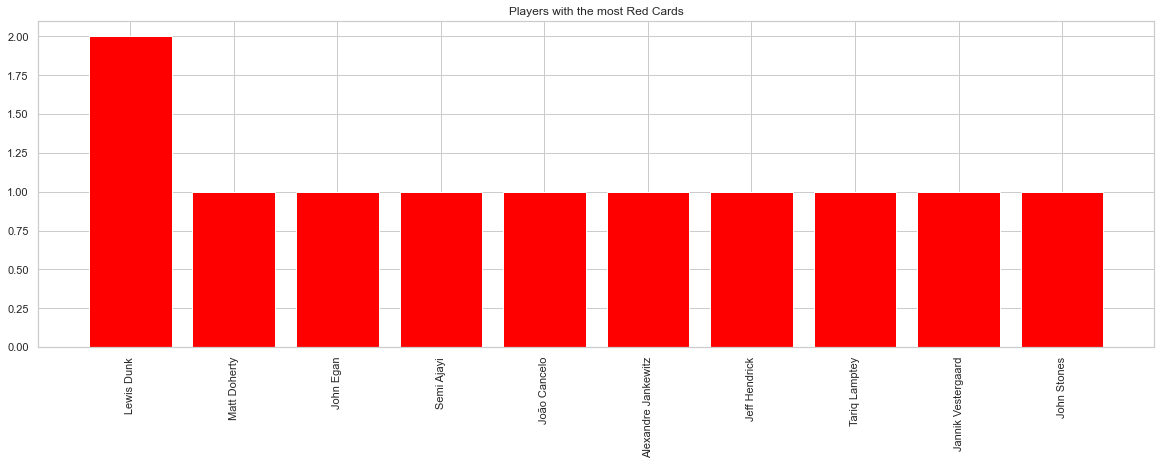

In [32]:
R = df.sort_values(by = 'Red_Cards', ascending = False)[:10]
plt.figure(figsize = (20, 6))
plt.title('Players with the most Red Cards')
plt.bar( R['Name'], R['Red_Cards'], label = 'Players', color = 'red')
plt.xticks(rotation=90)

In [33]:
#############################################################################################################################
#this line of code allows you to install or upgrade the mplsoccer package, enabling you to create soccer/football 
#visualizations using Matplotlib.

In [34]:
pip install -U mplsoccer

Note: you may need to restart the kernel to use updated packages.


In [35]:
#Importing the libraries from mplsoccer
from mplsoccer import Pitch, VerticalPitch

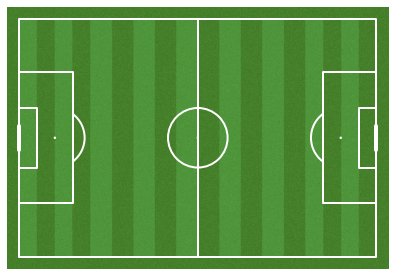

In [36]:
pitch = Pitch(pitch_color = 'grass', line_color='white', stripe=True)
# specifying figure size (width, height)
fig, ax = pitch.draw(figsize=(8, 4))

In [37]:
import os
from mplsoccer import Pitch, Sbopen, VerticalPitch

# importing the data parser through mplsoccer
parser  = Sbopen()
#This code snippet imports the necessary libraries, including os for system-related operations and mplsoccer for soccer 
#match data parsing and visualization. It initializes the parser object from the Sbopen class, which enables you to work
#with soccer match data in your Python code.

In [38]:
competitions = parser.competition()

In [39]:
competitions

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-11-15T17:26:10.871011,2021-06-13T16:17:31.694,None,2022-11-15T17:26:10.871011


In [40]:
parser.match(competition_id =16,season_id = 1)

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,...,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
0,18245,2018-05-26,2018-05-26 20:45:00,3,1,available,scheduled,2021-01-23 21:55:30.425330,2021-06-13 16:17:31.694,7,...,26,Final,4222,NSK Olimpiyskyi,238,Ukraine,727,Milorad Mažić,203,Serbia


In [41]:
df, df_related, df_freeze, df_tactics = parser.event(18245)


#df_related: This variable receives any related event data, which might include additional information or data linked to the main events.
#df_freeze: This variable receives a frozen version of the event data, which can be useful for caching or preventing modifications to the original data.
#df_tactics: This variable receives any tactical information or data associated with the match, such as formations, tactics, or player positions.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3497 entries, 0 to 3496
Data columns (total 72 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3497 non-null   object 
 1   index                           3497 non-null   int64  
 2   period                          3497 non-null   int64  
 3   timestamp                       3497 non-null   object 
 4   minute                          3497 non-null   int64  
 5   second                          3497 non-null   int64  
 6   possession                      3497 non-null   int64  
 7   duration                        2519 non-null   float64
 8   match_id                        3497 non-null   int64  
 9   type_id                         3497 non-null   int64  
 10  type_name                       3497 non-null   object 
 11  possession_team_id              3497 non-null   int64  
 12  possession_team_name            34

In [43]:
passes = df.loc[df['type_name'] == 'Pass'].loc[df['sub_type_name'] != 'Throw-in'].set_index('id')
#this line of code creates a subset of the original DataFrame df that contains only the rows representing passes 
#(excluding throw-ins) and sets the 'id' column as the index of the resulting DataFrame

In [44]:
passes.head()

,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,...,pass_miscommunication,shot_one_on_one,block_offensive,shot_redirect,foul_committed_advantage,foul_won_advantage,pass_goal_assist,foul_committed_card_id,foul_committed_card_name,injury_stoppage_in_chain
id,,,,,,,,,,,,,,,,,,,,,
25be91a5-a084-42cb-8cc1-a0fe7b0f52f9,5,1,00:00:00.371000,0,0,2,1.735914,18245,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b544eb38-7cc9-4cb5-99e9-ebac4fce9eb9,8,1,00:00:03.275000,0,3,2,3.772067,18245,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192c9629-1703-40ab-8498-cab869cf0144,12,1,00:00:08.236000,0,8,3,0.793057,18245,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
599fb72e-8baf-4d5b-815e-7beb8c54e6af,17,1,00:00:10.701000,0,10,3,0.987721,18245,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bea53e5b-5a58-4771-a8a6-8b385a10354a,20,1,00:00:11.728000,0,11,3,0.969765,18245,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df['player_name'].value_counts()
#The names of the players are a bit long, so we modify them

Toni Kroos                             263
Marcelo Vieira da Silva Júnior         256
Luka Modrić                            251
Sergio Ramos García                    237
Francisco Román Alarcón Suárez         190
Raphaël Varane                         176
José Ignacio Fernández Iglesias        145
Cristiano Ronaldo dos Santos Aveiro    143
Karim Benzema                          143
Carlos Henrique Casimiro               142
Georginio Wijnaldum                    141
Andrew Robertson                       140
Roberto Firmino Barbosa de Oliveira    138
Sadio Mané                             134
Jordan Brian Henderson                 130
James Philip Milner                    123
Trent Alexander-Arnold                 116
Dejan Lovren                           105
Daniel Carvajal Ramos                   97
Virgil van Dijk                         84
Keylor Navas Gamboa                     69
Loris Karius                            68
Adam David Lallana                      65
Mohamed Sal

In [46]:
# passing player name changes
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Marcelo Vieira da Silva Júnior', 'Marcelo') 
                                            if x == 'Marcelo Vieira da Silva Júnior' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Francisco Román Alarcón Suárez', 'Isco') 
                                            if x == 'Francisco Román Alarcón Suárez' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Daniel Carvajal Ramos', 'Carvajal') 
                                            if x == 'Daniel Carvajal Ramos' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Carlos Henrique Casimiro', 'Casemiro') 
                                            if x == 'Carlos Henrique Casimiro' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Cristiano Ronaldo dos Santos Aveiro', 'Ronaldo') 
                                            if x == 'Cristiano Ronaldo dos Santos Aveiro' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Marco Asensio Willemsen', 'Asensio') 
                                            if x == 'Marco Asensio Willemsen' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Álvaro Borja Morata Martín', 'Morata') 
                                            if x == 'Álvaro Borja Morata Martín' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Keylor Navas Gamboa', 'Keylor Navas') 
                                            if x == 'Keylor Navas Gamboa' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Sergio Ramos García', 'Sergio Ramos') 
                                            if x == 'Sergio Ramos García' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('José Ignacio Fernández Iglesias', 'Nacho') 
                                            if x == 'José Ignacio Fernández Iglesias' else x)
# recipient player changes
df['pass_recipient_name'] = df['pass_recipient_name'].apply(lambda x: x.replace('Marcelo Vieira da Silva Júnior', 'Marcelo') 
                                            if x == 'Marcelo Vieira da Silva Júnior' else x)
df['pass_recipient_name'] = df['pass_recipient_name'].apply(lambda x: x.replace('Francisco Román Alarcón Suárez', 'Isco') 
                                            if x == 'Francisco Román Alarcón Suárez' else x)
df['pass_recipient_name'] = df['pass_recipient_name'].apply(lambda x: x.replace('Daniel Carvajal Ramos', 'Carvajal') 
                                            if x == 'Daniel Carvajal Ramos' else x)
df['pass_recipient_name'] = df['pass_recipient_name'].apply(lambda x: x.replace('Carlos Henrique Casimiro', 'Casemiro') 
                                            if x == 'Carlos Henrique Casimiro' else x)
df['pass_recipient_name'] = df['pass_recipient_name'].apply(lambda x: x.replace('Cristiano Ronaldo dos Santos Aveiro', 'Ronaldo') 
                                            if x == 'Cristiano Ronaldo dos Santos Aveiro' else x)
df['pass_recipient_name'] = df['pass_recipient_name'].apply(lambda x: x.replace('Marco Asensio Willemsen', 'Asensio') 
                                            if x == 'Marco Asensio Willemsen' else x)
df['pass_recipient_name'] = df['pass_recipient_name'].apply(lambda x: x.replace('Álvaro Borja Morata Martín', 'Morata') 
                                            if x == 'Álvaro Borja Morata Martín' else x)
df['pass_recipient_name'] = df['pass_recipient_name'].apply(lambda x: x.replace('Keylor Navas Gamboa', 'Keylor Navas') 
                                            if x == 'Keylor Navas Gamboa' else x)
df['pass_recipient_name'] = df['pass_recipient_name'].apply(lambda x: x.replace('Sergio Ramos García', 'Sergio Ramos') 
                                            if x == 'Sergio Ramos García' else x)

In [47]:
df['player_name'].value_counts()

Toni Kroos                             263
Marcelo                                256
Luka Modrić                            251
Sergio Ramos                           237
Isco                                   190
Raphaël Varane                         176
Nacho                                  145
Ronaldo                                143
Karim Benzema                          143
Casemiro                               142
Georginio Wijnaldum                    141
Andrew Robertson                       140
Roberto Firmino Barbosa de Oliveira    138
Sadio Mané                             134
Jordan Brian Henderson                 130
James Philip Milner                    123
Trent Alexander-Arnold                 116
Dejan Lovren                           105
Carvajal                                97
Virgil van Dijk                         84
Keylor Navas                            69
Loris Karius                            68
Adam David Lallana                      65
Mohamed Sal

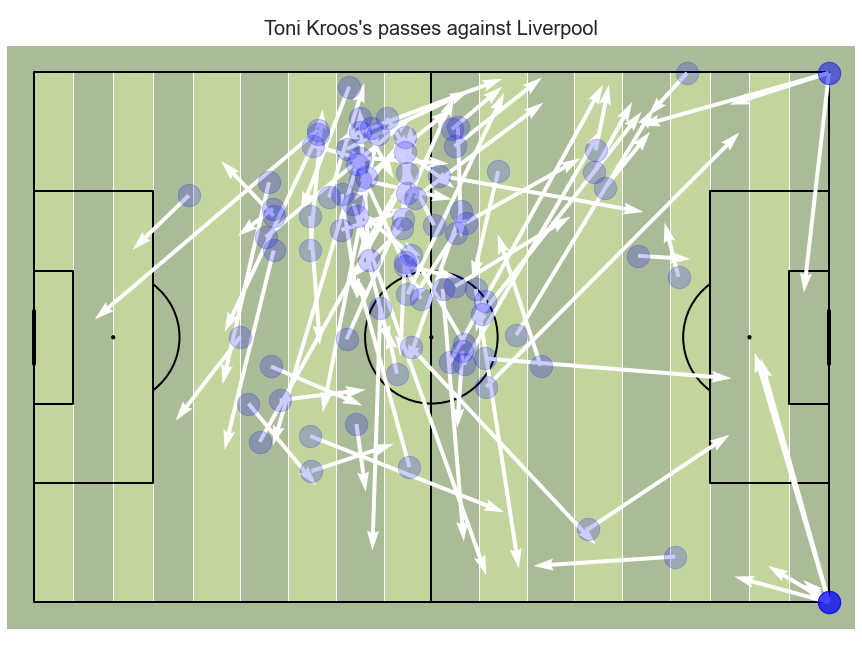

In [48]:
kroos_filter = (df.type_name == 'Pass') & (df.player_name == "Toni Kroos")
df_pass = df.loc[kroos_filter, ['x', 'y', 'end_x', 'end_y']]

pitch = Pitch(line_color='black',pitch_color='#aabb97',stripe_color='#c2d59d',stripe=True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.arrows(df_pass.x, df_pass.y,
            df_pass.end_x, df_pass.end_y, color = "white", ax=ax['pitch'])
pitch.scatter(df_pass.x, df_pass.y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])
fig.suptitle("Toni Kroos's passes against Liverpool", fontsize = 20)

plt.show()
#The code begins by filtering the DataFrame df using two conditions: type_name == 'Pass' and player_name == "Toni Kroos". 
#This creates a boolean filter kroos_filter that selects only the rows representing passes made by Toni Kroos.

#The filtered data is then assigned to a new DataFrame called df_pass, which includes specific columns: 'x', 'y', 'end_x', and
#'end_y'. These columns represent the starting and ending coordinates of the passes.

#The code initializes a Pitch object named pitch from the mplsoccer library. It customizes the appearance of the pitch by 
#specifying parameters such as line color, pitch color, stripe color, and enabling stripes.

#The pitch.grid() function is called to draw the pitch grid and set the layout of the visualization. It configures the grid
#height, title height, axis visibility, endnote height, title space, and endnote space.

#The pitch.arrows() function is used to plot arrows on the pitch, representing the passes made by Toni Kroos. It takes the 
#starting and ending coordinates from the df_pass DataFrame and configures the arrow color.

#The pitch.scatter() function is called to plot a scatter plot of the starting coordinates of the passes made by Toni Kroos. 
#It sets the transparency (alpha), size (s), and color of the scatter points.

#Finally, the visualization is displayed using plt.show(). A title is added to the figure using fig.suptitle() to indicate that 
#it shows Toni Kroos's passes against Liverpool.

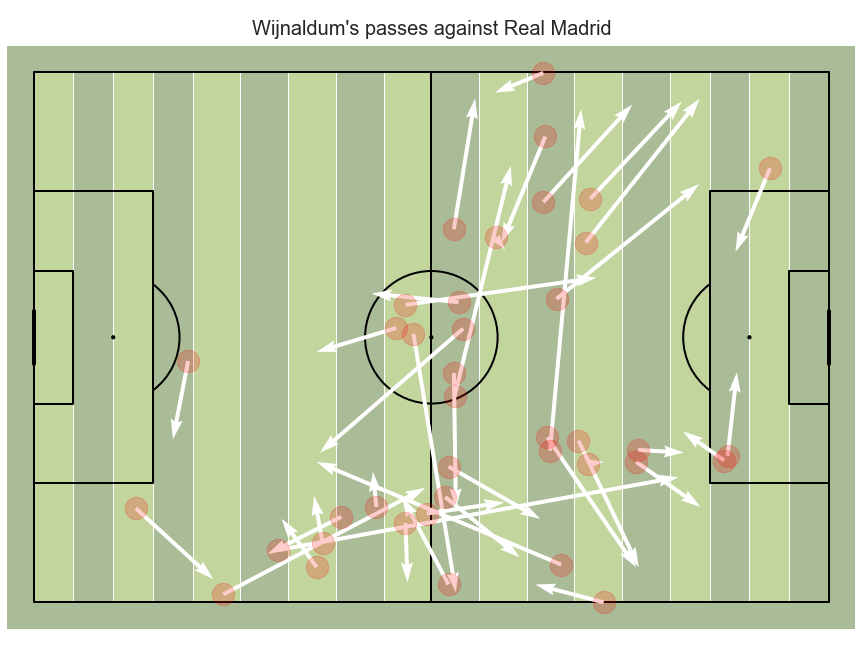

In [49]:
Wijnaldum_filter = (df.type_name == 'Pass') & (df.player_name == "Georginio Wijnaldum")
df_pass = df.loc[Wijnaldum_filter, ['x', 'y', 'end_x', 'end_y']]

pitch = Pitch(line_color='black',pitch_color='#aabb97',stripe_color='#c2d59d',stripe=True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.arrows(df_pass.x, df_pass.y,
            df_pass.end_x, df_pass.end_y, color = "white", ax=ax['pitch'])
pitch.scatter(df_pass.x, df_pass.y, alpha = 0.2, s = 500, color = "red", ax=ax['pitch'])
fig.suptitle("Wijnaldum's passes against Real Madrid", fontsize = 20)

plt.show()

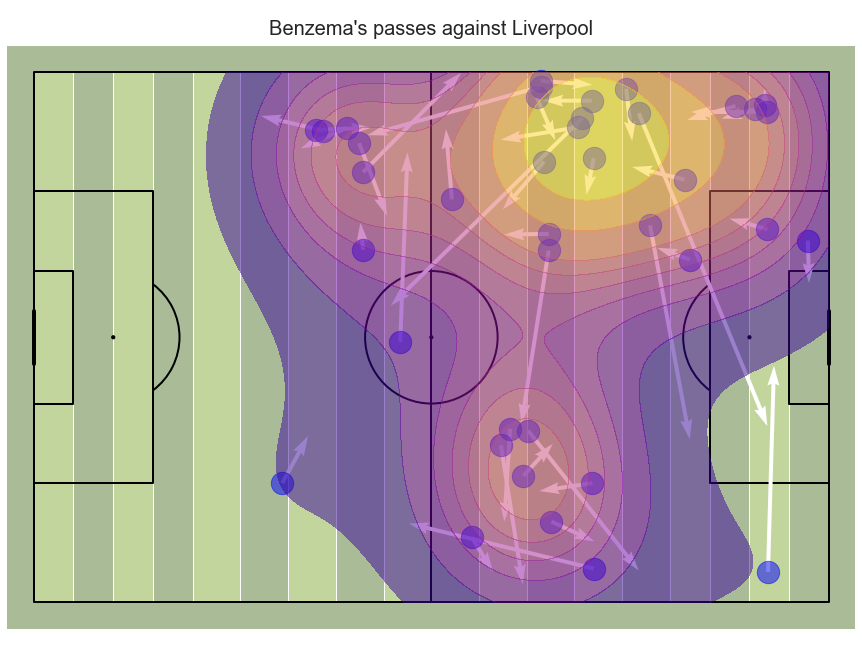

In [50]:
Benzema_filter = (df.type_name == 'Pass') & (df.player_name == "Karim Benzema")
df_pass = df.loc[Benzema_filter, ['x', 'y', 'end_x', 'end_y']]

pitch = Pitch(line_color='black',pitch_color='#aabb97',stripe_color='#c2d59d',stripe=True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.arrows(df_pass.x, df_pass.y,
            df_pass.end_x, df_pass.end_y, color = "white", ax=ax['pitch'])
pitch.scatter(df_pass.x, df_pass.y, alpha = 0.5, s = 500, color = "blue", ax=ax['pitch'])


#Create the heatmap
pitch.kdeplot(
        x=df_pass['x'],
        y=df_pass['y'],
        shade = True,
        shade_lowest=False,
        alpha=.5,
        n_levels=10,
        cmap = 'plasma',
        ax=ax['pitch']
)


fig.suptitle("Benzema's passes against Liverpool", fontsize = 20)

plt.show()

#The resulting visualization provides insights into Benzema's passing patterns against Liverpool.

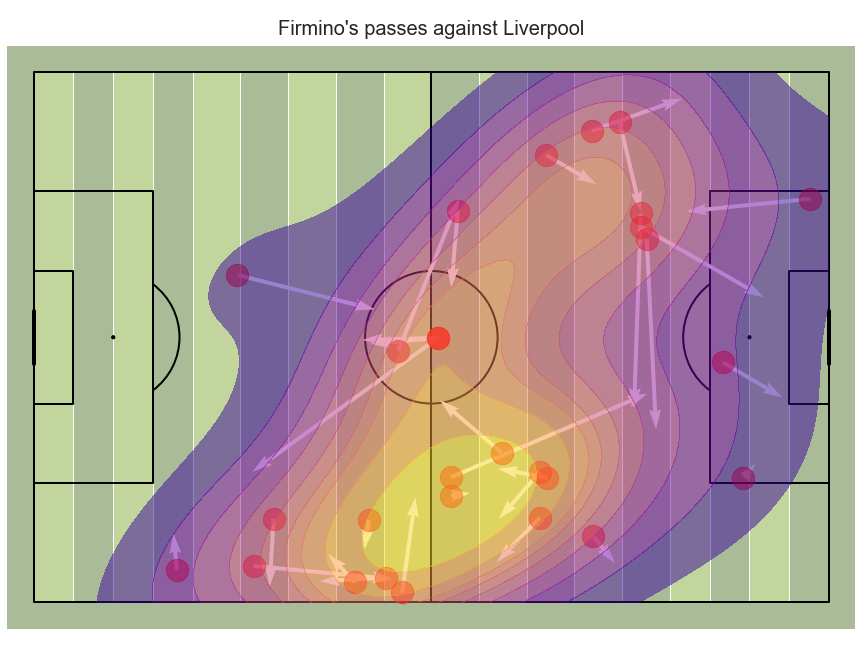

In [51]:
Firmino_filter = (df.type_name == 'Pass') & (df.player_name == "Roberto Firmino Barbosa de Oliveira")
df_pass = df.loc[Firmino_filter, ['x', 'y', 'end_x', 'end_y']]

pitch = Pitch(line_color='black',pitch_color='#aabb97',stripe_color='#c2d59d',stripe=True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.arrows(df_pass.x, df_pass.y,
            df_pass.end_x, df_pass.end_y, color = "white", ax=ax['pitch'])
pitch.scatter(df_pass.x, df_pass.y, alpha = 0.5, s = 500, color = "red", ax=ax['pitch'])


#Create the heatmap
pitch.kdeplot(
        x=df_pass['x'],
        y=df_pass['y'],
        shade = True,
        shade_lowest=False,
        alpha=.5,
        n_levels=10,
        cmap = 'plasma',
        ax=ax['pitch']
)


fig.suptitle("Firmino's passes against Liverpool", fontsize = 20)

plt.show()

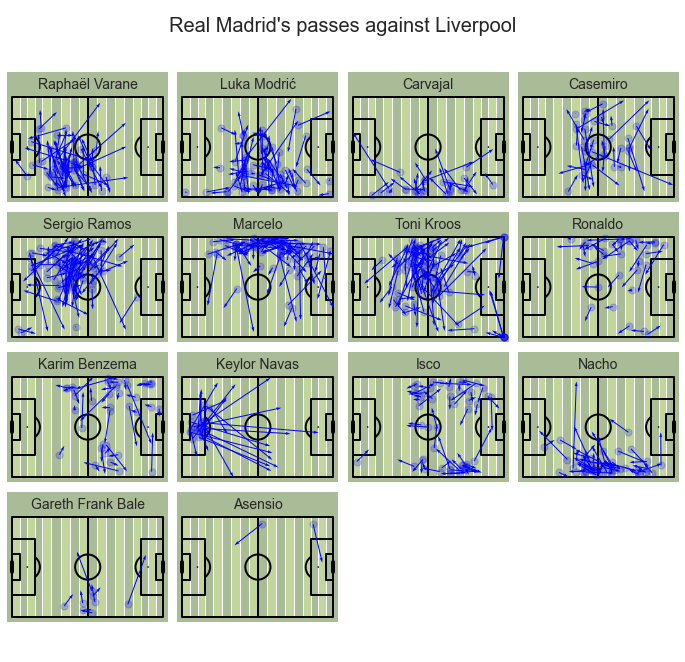

<Figure size 1008x720 with 0 Axes>

In [52]:
# filtering to passes by Real Madrid players
rm_passes = (df.type_name == 'Pass') & (df.team_name == "Real Madrid") & (df.sub_type_name != "Throw-in")
# selecting only relevant columsn for the pass map
df_passes = df.loc[rm_passes, ['x', 'y', 'end_x', 'end_y', 'player_name']]
#get the list of all players who made a pass
names = df_passes['player_name'].unique()
#draw 4x4 pitches
pitch = Pitch(line_color='black',pitch_color='#aabb97',stripe_color='#c2d59d',stripe=True,pad_top=20)
fig, axs = pitch.grid(ncols = 4, nrows = 4, grid_height=0.85, title_height=0.06, axis=False,endnote_height=0.04, title_space=0.04, endnote_space=0.01)
plt.figure(figsize=(14,10))
#for each player
for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
    #put player name over the plot
    ax.text(60, -10, name,ha='center', va='center', fontsize=14)
    #take only passes by this player
    player_df = df_passes.loc[df_passes["player_name"] == name]
    #scatter -  plots the player position with 0.2 alpha(visibility)
    pitch.scatter(player_df.x, player_df.y, alpha = 0.2, s = 50, color = "blue", ax=ax)
    #plot pass arrows
    pitch.arrows(player_df.x, player_df.y,
            player_df.end_x, player_df.end_y, color = "blue", ax=ax, width=1)

#We have more than enough pitches - remove them
for ax in axs['pitch'][-1, 16 - len(names):]:
    ax.remove()

#Another way to set title using mplsoccer
axs['title'].text(0.5, 0.5, "Real Madrid's passes against Liverpool", ha='center', va='center', fontsize=20)
plt.show()

LinAlgError: 2-th leading minor of the array is not positive definite

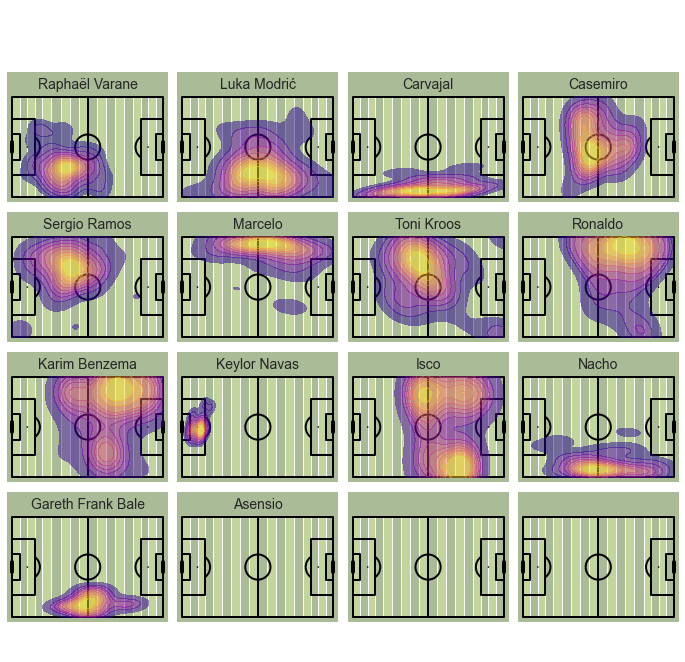

<Figure size 1008x720 with 0 Axes>

In [53]:
#draw 4x4 pitches
pitch = Pitch(line_color='black',pitch_color='#aabb97',stripe_color='#c2d59d',stripe=True,pad_top=20)
fig, axs = pitch.grid(ncols = 4, nrows = 4, grid_height=0.85, title_height=0.06, axis=False,endnote_height=0.04, title_space=0.04, endnote_space=0.01)
plt.figure(figsize=(14,10))
#for each player
for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
    #put player name over the plot
    ax.text(60, -10, name,ha='center', va='center', fontsize=14)
    #take only passes by this player
    player_df = df_passes.loc[df_passes["player_name"] == name]
    #Create the heatmap
    pitch.kdeplot(
        x=player_df['x'],
        y=player_df['y'],
        shade = True,
        shade_lowest=False,
        alpha=.5,
        n_levels=10,
        cmap = 'plasma',
        ax=ax
    )

#We have more than enough pitches - remove them
for ax in axs['pitch'][-1, 16 - len(names):]:
    ax.remove()

#Another way to set title using mplsoccer
axs['title'].text(0.5, 0.5, "Real Madrid's passes against Liverpool", ha='center', va='center', fontsize=20)
plt.show()

In [54]:
xg_events = df
[['team','minute','type_name','shot_body_part','shot_end_location','shot_statsbomb_xg','shot_technique','shot_type','x','y']]
xg_events = xg_events [xg_events['team_name']=='Real Madrid'].reset_index()
xg_events[xg_events.shot_statsbomb_xg.isna()==False]
rm_xg = xg_events [['minute','type_name','shot_statsbomb_xg','x','y']]
rm_xg[rm_xg.shot_statsbomb_xg.isna()==False]

,minute,type_name,shot_statsbomb_xg,x,y
223,10,Shot,0.023376,94.5,26.9
401,14,Shot,0.012569,111.7,58.7
705,31,Shot,0.034284,107.1,53.2
752,32,Shot,0.095949,108.8,32.4
1086,42,Shot,0.171412,112.7,39.9
1144,44,Shot,0.048764,110.3,54.4
1214,47,Shot,0.021335,93.6,27.5
1284,47,Shot,0.123956,105.9,35.6
1336,50,Shot,0.622400,103.7,46.4
1568,59,Shot,0.105558,111.3,44.6


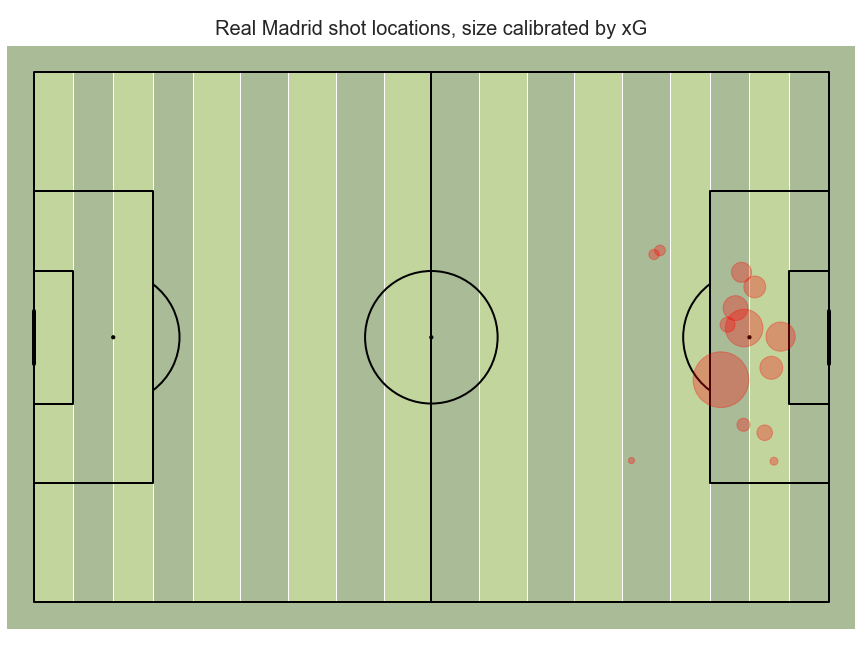

In [55]:
rm_shots =rm_xg[rm_xg.type_name=='Shot']
pitch = Pitch(line_color='black',pitch_color='#aabb97',stripe_color='#c2d59d',stripe=True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
plt.suptitle("Real Madrid shot locations, size calibrated by xG",fontsize=20)
pitch.scatter(rm_shots.x, rm_shots.y, alpha = 0.3, s = rm_shots.shot_statsbomb_xg*5000, color = "red", ax=ax['pitch'],)

In [56]:
#check for index of first sub
sub = df.loc[df["type_name"] == "Substitution"].loc[df["team_name"] == "Real Madrid"].iloc[0]["index"]
#make df with successfull passes by Real Madrid until the first substitution
rm_passes = (df.type_name == 'Pass') & (df.team_name == "Real Madrid") & (df.index < sub) & (df.outcome_name.isnull()) & (df.sub_type_name != "Throw-in")
#taking necessary columns
rm_pass = df.loc[rm_passes, ['x', 'y', 'end_x', 'end_y', "player_name", "pass_recipient_name"]]
#adjusting that only the surname of a player is presented.
rm_pass["player_name"] = rm_pass["player_name"].apply(lambda x: str(x).split()[-1])
rm_pass["pass_recipient_name"] = rm_pass["pass_recipient_name"].apply(lambda x: str(x).split()[-1])
'''
Finding the index of the first substitution for the team "Real Madrid":

It filters the DataFrame df to locate rows where the "type_name" is "Substitution" and the "team_name" is "Real Madrid".
It selects the first row using .iloc[0].
It retrieves the value in the "index" column of the selected row and assigns it to the variable sub.
Creating a DataFrame of successful passes by Real Madrid until the first substitution:

It defines a boolean condition rm_passes using multiple criteria:
The "type_name" is "Pass".
The "team_name" is "Real Madrid".
The "index" is less than the value of sub (the index of the first substitution).
The "outcome_name" is null (indicating a successful pass).
The "sub_type_name" is not "Throw-in" (excluding throw-in passes).
It applies the boolean condition to the DataFrame df and selects the columns 'x', 'y', 'end_x', 'end_y', 'player_name', and 'pass_recipient_name' using .loc[], and assigns the resulting DataFrame to rm_pass.
Adjusting the player names:

It modifies the "player_name" and "pass_recipient_name" columns in rm_pass to contain only the surnames of the players.
It applies the split() and [-1] operations on each name using lambda functions to extract the last name from the full name.
'''

'\nFinding the index of the first substitution for the team "Real Madrid":\n\nIt filters the DataFrame df to locate rows where the "type_name" is "Substitution" and the "team_name" is "Real Madrid".\nIt selects the first row using .iloc[0].\nIt retrieves the value in the "index" column of the selected row and assigns it to the variable sub.\nCreating a DataFrame of successful passes by Real Madrid until the first substitution:\n\nIt defines a boolean condition rm_passes using multiple criteria:\nThe "type_name" is "Pass".\nThe "team_name" is "Real Madrid".\nThe "index" is less than the value of sub (the index of the first substitution).\nThe "outcome_name" is null (indicating a successful pass).\nThe "sub_type_name" is not "Throw-in" (excluding throw-in passes).\nIt applies the boolean condition to the DataFrame df and selects the columns \'x\', \'y\', \'end_x\', \'end_y\', \'player_name\', and \'pass_recipient_name\' using .loc[], and assigns the resulting DataFrame to rm_pass.\nAdjus

In [57]:
scatter_df = pd.DataFrame()
for i, name in enumerate(rm_pass["player_name"].unique()):
    passx = rm_pass.loc[rm_pass["player_name"] == name]["x"].to_numpy()
    recx = rm_pass.loc[rm_pass["pass_recipient_name"] == name]["end_x"].to_numpy()
    passy = rm_pass.loc[rm_pass["player_name"] == name]["y"].to_numpy()
    recy = rm_pass.loc[rm_pass["pass_recipient_name"] == name]["end_y"].to_numpy()
    scatter_df.at[i, "player_name"] = name
    #make sure that x and y location for each circle representing the player is the average of passes and receptions
    scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
    scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
    #calculate number of passes
    scatter_df.at[i, "no"] = rm_pass.loc[rm_pass["player_name"] == name].count().iloc[0]
#adjust the size of a circle so that the player who made more passes 
scatter_df['marker_size'] = (scatter_df["no"] / scatter_df["no"].max() * 1500)
'''
Initializing an empty DataFrame scatter_df to store the summarized pass and reception data.

Iterating over each unique player name in the "player_name" column of rm_pass using enumerate(rm_pass["player_name"].unique()):

For each player, it retrieves the respective pass and reception locations and stores them in separate arrays (passx, recx, passy, recy) based on specific conditions.
It calculates the average location for each player by taking the mean of the concatenated pass and reception locations for both x and y coordinates.
It assigns the player name, average x and y coordinates, and the count of passes made by the player to the corresponding rows in scatter_df.
Calculating the marker size for each player based on the number of passes made:

It normalizes the number of passes ("no") for each player by dividing it by the maximum number of passes in the dataset (scatter_df["no"].max()).
It multiplies the normalized number of passes by a scaling factor (1500) to determine the marker size for each player.
It assigns the calculated marker sizes to the "marker_size" column in scatter_df.
'''

'\nInitializing an empty DataFrame scatter_df to store the summarized pass and reception data.\n\nIterating over each unique player name in the "player_name" column of rm_pass using enumerate(rm_pass["player_name"].unique()):\n\nFor each player, it retrieves the respective pass and reception locations and stores them in separate arrays (passx, recx, passy, recy) based on specific conditions.\nIt calculates the average location for each player by taking the mean of the concatenated pass and reception locations for both x and y coordinates.\nIt assigns the player name, average x and y coordinates, and the count of passes made by the player to the corresponding rows in scatter_df.\nCalculating the marker size for each player based on the number of passes made:\n\nIt normalizes the number of passes ("no") for each player by dividing it by the maximum number of passes in the dataset (scatter_df["no"].max()).\nIt multiplies the normalized number of passes by a scaling factor (1500) to determ

In [58]:
#counting passes between players
rm_pass["pair_key"] = rm_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
lines_df = rm_pass.groupby(["pair_key"]).x.count().reset_index()
lines_df.rename({'x':'pass_count'}, axis='columns', inplace=True)
#setting a threshold. You can try to investigate how it changes when you change it.
lines_df = lines_df[lines_df['pass_count']>2]


'''
Adding a new column to rm_pass called "pair_key" which combines and sorts the player names (from the "player_name" and 
"pass_recipient_name" columns) to create a unique identifier for each pair of players. This identifier helps in counting
the passes between the players.

Grouping the data in rm_pass by the "pair_key" column and counting the occurrences of the "x" column (which represents the 
passes) for each pair of players. The result is stored in the lines_df DataFrame with the column name "pass_count".

Renaming the "x" column in lines_df to "pass_count" for clarity.

Applying a threshold to filter out pairs of players with a low number of passes. The code keeps only the rows in lines_df where 
the "pass_count" is greater than 2. You can modify this threshold value to observe how it affects the analysis.
'''

'\nAdding a new column to rm_pass called "pair_key" which combines and sorts the player names (from the "player_name" and \n"pass_recipient_name" columns) to create a unique identifier for each pair of players. This identifier helps in counting\nthe passes between the players.\n\nGrouping the data in rm_pass by the "pair_key" column and counting the occurrences of the "x" column (which represents the \npasses) for each pair of players. The result is stored in the lines_df DataFrame with the column name "pass_count".\n\nRenaming the "x" column in lines_df to "pass_count" for clarity.\n\nApplying a threshold to filter out pairs of players with a low number of passes. The code keeps only the rows in lines_df where \nthe "pass_count" is greater than 2. You can modify this threshold value to observe how it affects the analysis.\n'

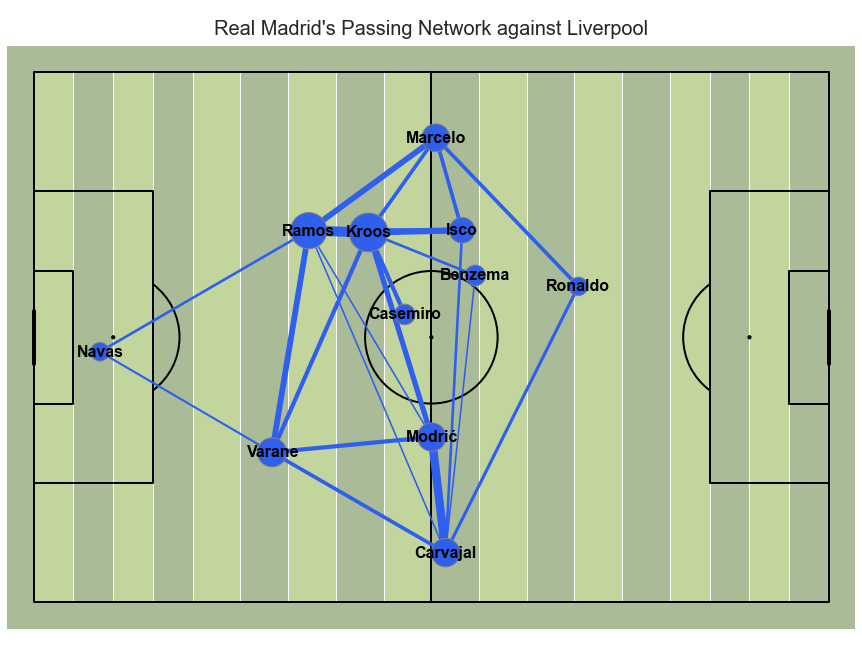

'\nThe Pitch class is instantiated to create a pitch visualization with specified colors and settings.\n\nThe fig and ax objects are created using the grid method of the Pitch class. This sets up the pitch grid, title, endnote,\nand their respective sizes and positions.\n\nThe scatter plot is created using the scatter method of the Pitch class. It takes the x and y coordinates from the scatter_df \nDataFrame, marker size from the "marker_size" column, and sets the color, edge color, linewidth, and transparency.\n\nPlayer names are annotated on the plot using the annotate method of the Pitch class. It iterates over each row in scatter_df \nand adds the player name at the specified x and y coordinates.\n\nLines representing passes between players are plotted using the lines method of the Pitch class. It iterates over each row\nin lines_df and retrieves the player names, their average x and y coordinates from scatter_df, and the number of passes between \nthem. The line width is adjusted 

In [65]:
#plot once again pitch and vertices
pitch = Pitch(line_color='black',pitch_color='#aabb97',stripe_color='#c2d59d',stripe=True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='#2f5fed', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)
for i, row in lines_df.iterrows():
        player1 = row["pair_key"].split("_")[0]
        player2 = row['pair_key'].split("_")[1]
        #take the average location of players to plot a line between them 
        player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['x'].iloc[0]
        player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['y'].iloc[0]
        player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['x'].iloc[0]
        player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['y'].iloc[0]
        num_passes = row["pass_count"]
        #adjust the line width so that the more passes, the wider the line
        line_width = (num_passes / lines_df['pass_count'].max() * 10)
        #plot lines on the pitch
        pitch.lines(player1_x, player1_y, player2_x, player2_y,
                        alpha=1, lw=line_width, zorder=2, color="#2f5fed", ax = ax["pitch"])
fig.suptitle("Real Madrid's Passing Network against Liverpool", fontsize = 20)
plt.show()
'''
The Pitch class is instantiated to create a pitch visualization with specified colors and settings.

The fig and ax objects are created using the grid method of the Pitch class. This sets up the pitch grid, title, endnote,
and their respective sizes and positions.

The scatter plot is created using the scatter method of the Pitch class. It takes the x and y coordinates from the scatter_df 
DataFrame, marker size from the "marker_size" column, and sets the color, edge color, linewidth, and transparency.

Player names are annotated on the plot using the annotate method of the Pitch class. It iterates over each row in scatter_df 
and adds the player name at the specified x and y coordinates.

Lines representing passes between players are plotted using the lines method of the Pitch class. It iterates over each row
in lines_df and retrieves the player names, their average x and y coordinates from scatter_df, and the number of passes between 
them. The line width is adjusted based on the number of passes to indicate the strength of the connection.

The title of the plot is set using fig.suptitle to describe the passing network of Real Madrid against Liverpool.

Finally, the plot is displayed using plt.show().
'''